In [1]:
import pandas as pd 

In [240]:
history = pd.read_csv('4221de97-1b5b-4790-ba48-700bac4cc162.csv', sep=';')
history['timestamp'] = pd.to_timedelta(history['timestamp'], unit='s')
history = history.set_index(['timestamp', 'product'])
history.head(20)


day  bid_price_1  bid_volume_1  bid_price_2  \
timestamp       product                                                         
0 days 00:00:00 RAINFOREST_RESIN   -1        10002             1       9996.0   
                KELP               -1         2028             1       2026.0   
0 days 00:01:40 KELP               -1         2025            24          NaN   
                RAINFOREST_RESIN   -1         9996             2       9995.0   
0 days 00:03:20 RAINFOREST_RESIN   -1         9995            20          NaN   
                KELP               -1         2025            22          NaN   
0 days 00:05:00 KELP               -1         2025            31          NaN   
                RAINFOREST_RESIN   -1         9996             2       9995.0   
0 days 00:06:40 RAINFOREST_RESIN   -1         9996             2       9995.0   
                KELP               -1         2025            27          NaN   
0 days 00:08:20 KELP               -1         2025            30          NaN   
                RAINFOREST_RESIN   -1         9995            30          NaN   
0 days 00:10:00 RAINFOREST_RESIN   -1        10000             5       9995.0   
                KELP               -1         2026             5       2025.0   
0 days 00:11:40 KELP               -1         2025             2       2024.0   
                RAINFOREST_RESIN   -1         9995            23          NaN   
0 days 00:13:20 RAINFOREST_RESIN   -1         9996             1       9995.0   
                KELP               -1         2024             1       2023.0   
0 days 00:15:00 KELP               -1         2024            23          NaN   
                RAINFOREST_RESIN   -1         9996             1       9995.0   

                                  bid_volume_2  bid_price_3  bid_volume_3  \
timestamp       product                                                     
0 days 00:00:00 RAINFOREST_RESIN           2.0       9995.0          29.0   
                KELP                       2.0       2025.0          29.0   
0 days 00:01:40 KELP                       NaN          NaN           NaN   
                RAINFOREST_RESIN          22.0          NaN           NaN   
0 days 00:03:20 RAINFOREST_RESIN           NaN          NaN           NaN   
                KELP                       NaN          NaN           NaN   
0 days 00:05:00 KELP                       NaN          NaN           NaN   
                RAINFOREST_RESIN          29.0          NaN           NaN   
0 days 00:06:40 RAINFOREST_RESIN          25.0          NaN           NaN   
                KELP                       NaN          NaN           NaN   
0 days 00:08:20 KELP                       NaN          NaN           NaN   
                RAINFOREST_RESIN           NaN          NaN           NaN   
0 days 00:10:00 RAINFOREST_RESIN          25.0          NaN           NaN   
                KELP                      31.0          NaN           NaN   
0 days 00:11:40 KELP                      23.0          NaN           NaN   
                RAINFOREST_RESIN           NaN          NaN           NaN   
0 days 00:13:20 RAINFOREST_RESIN          29.0          NaN           NaN   
                KELP                      29.0          NaN           NaN   
0 days 00:15:00 KELP                       NaN          NaN           NaN   
                RAINFOREST_RESIN          22.0          NaN           NaN   

                                  ask_price_1  ask_volume_1  ask_price_2  \
timestamp       product                                                    
0 days 00:00:00 RAINFOREST_RESIN        10004             2      10005.0   
                KELP                     2029            31          NaN   
0 days 00:01:40 KELP                     2028             2       2029.0   
                RAINFOREST_RESIN        10004             2      10005.0   
0 days 00:03:20 RAINFOREST_RESIN        10005            20          NaN   
                KELP    

In [241]:
def get_price_change(series):
    return (series.diff(1)/series)

def resample(series, period):
    return series.resample(period).mean()

In [326]:
kelp_price = history.xs('KELP', level='product')['mid_price']
rainforest_resin_price = history.xs('RAINFOREST_RESIN', level='product')['mid_price']

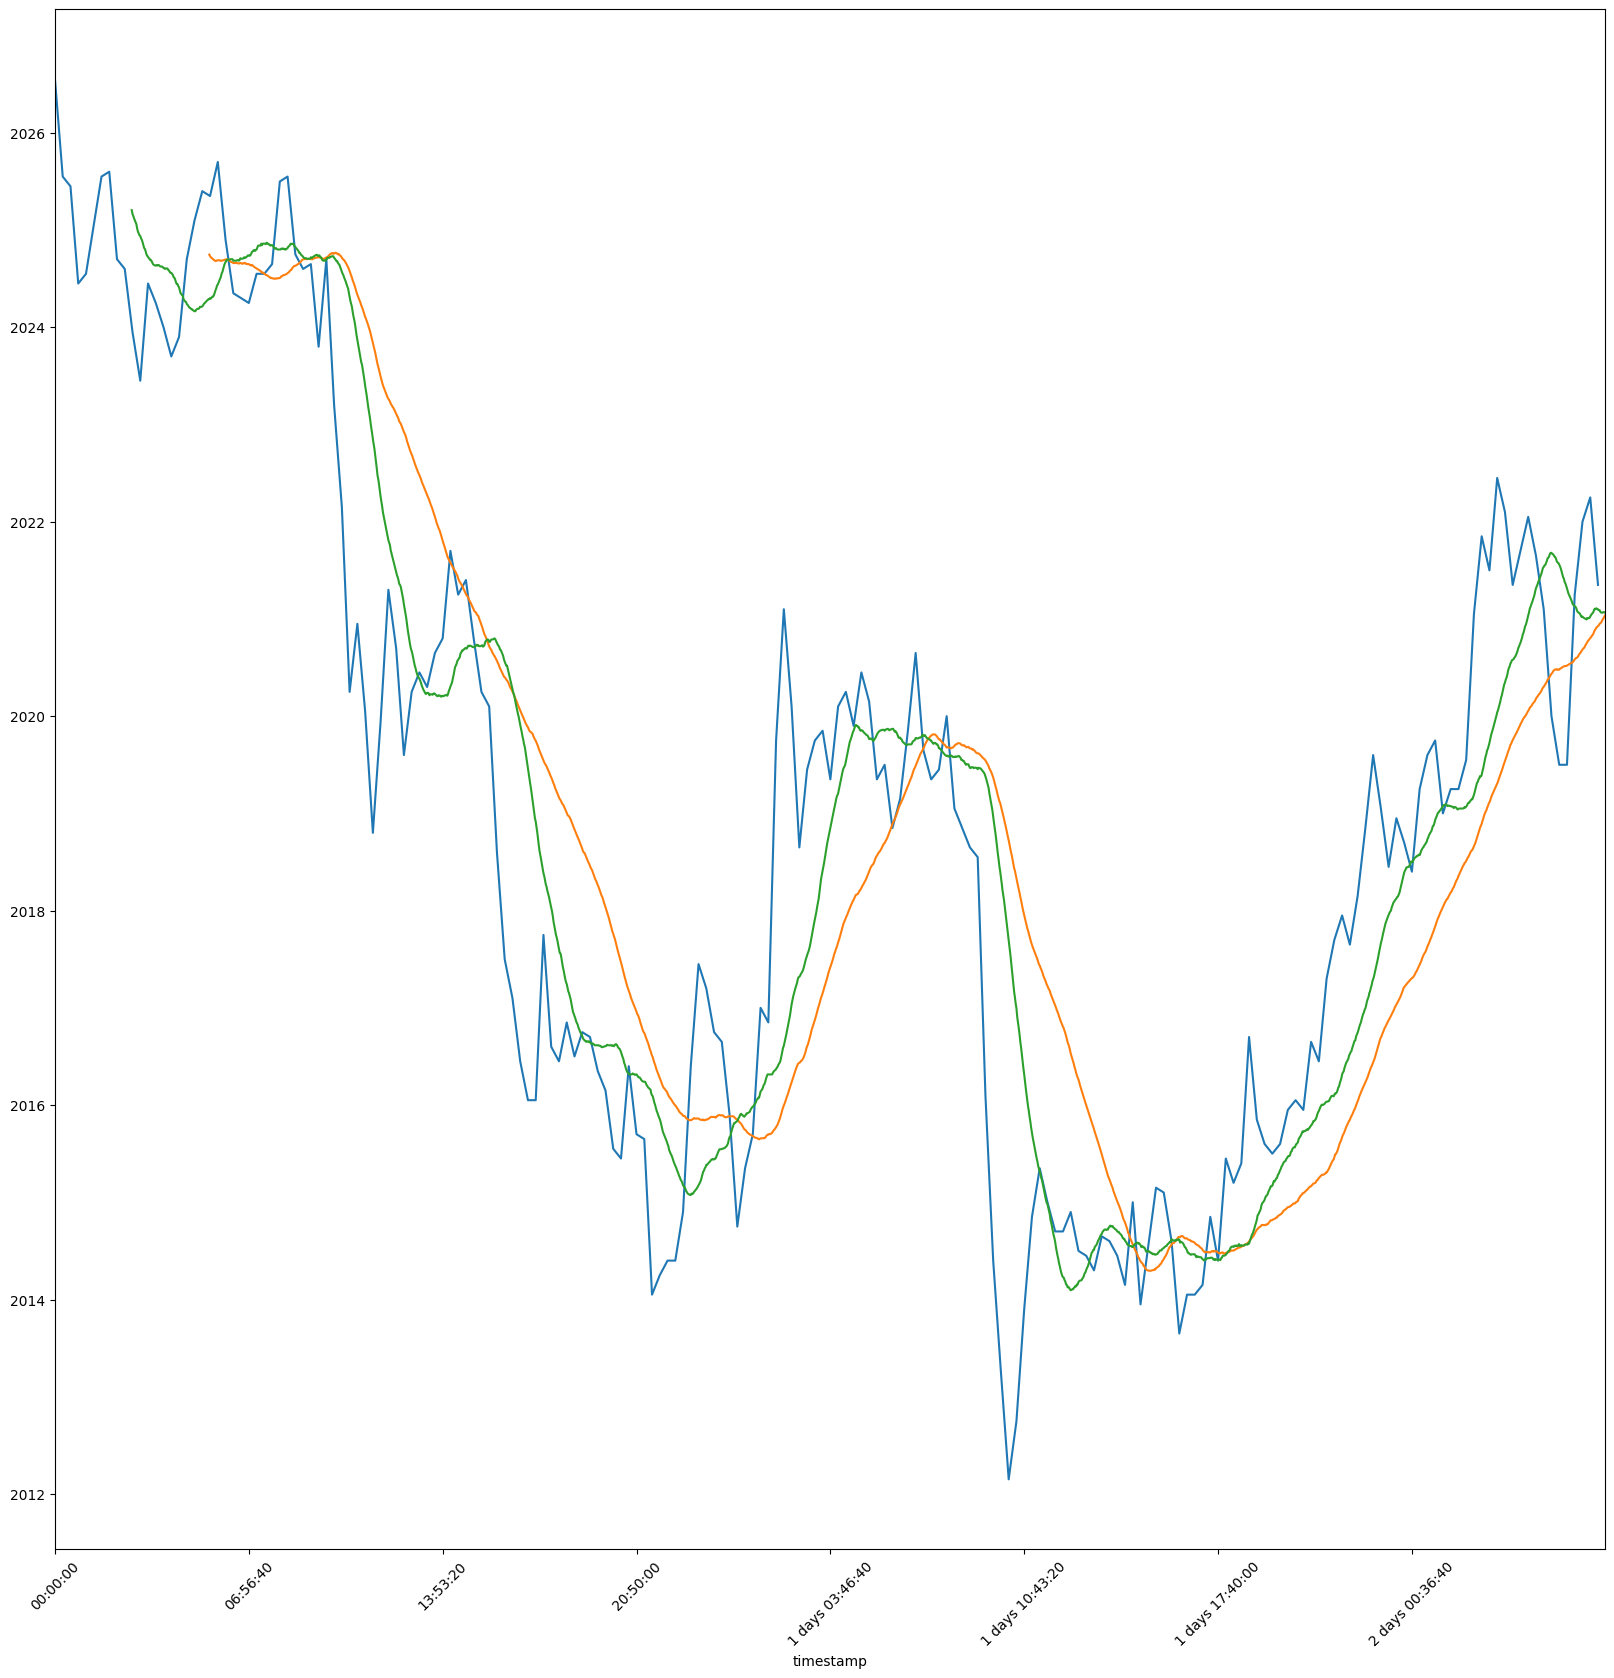

In [243]:
import matplotlib.pyplot as plt
%matplotlib inline

resampled_kelp  = resample(kelp_price, '1000s')
#resampled_kelp.index = resampled_kelp.index.total_seconds() * 1000
resampled_kelp.plot()
kelp_price.rolling(200).mean().plot()
kelp_price.rolling(100).mean().plot()

plt.xticks(rotation=45)
plt.show()

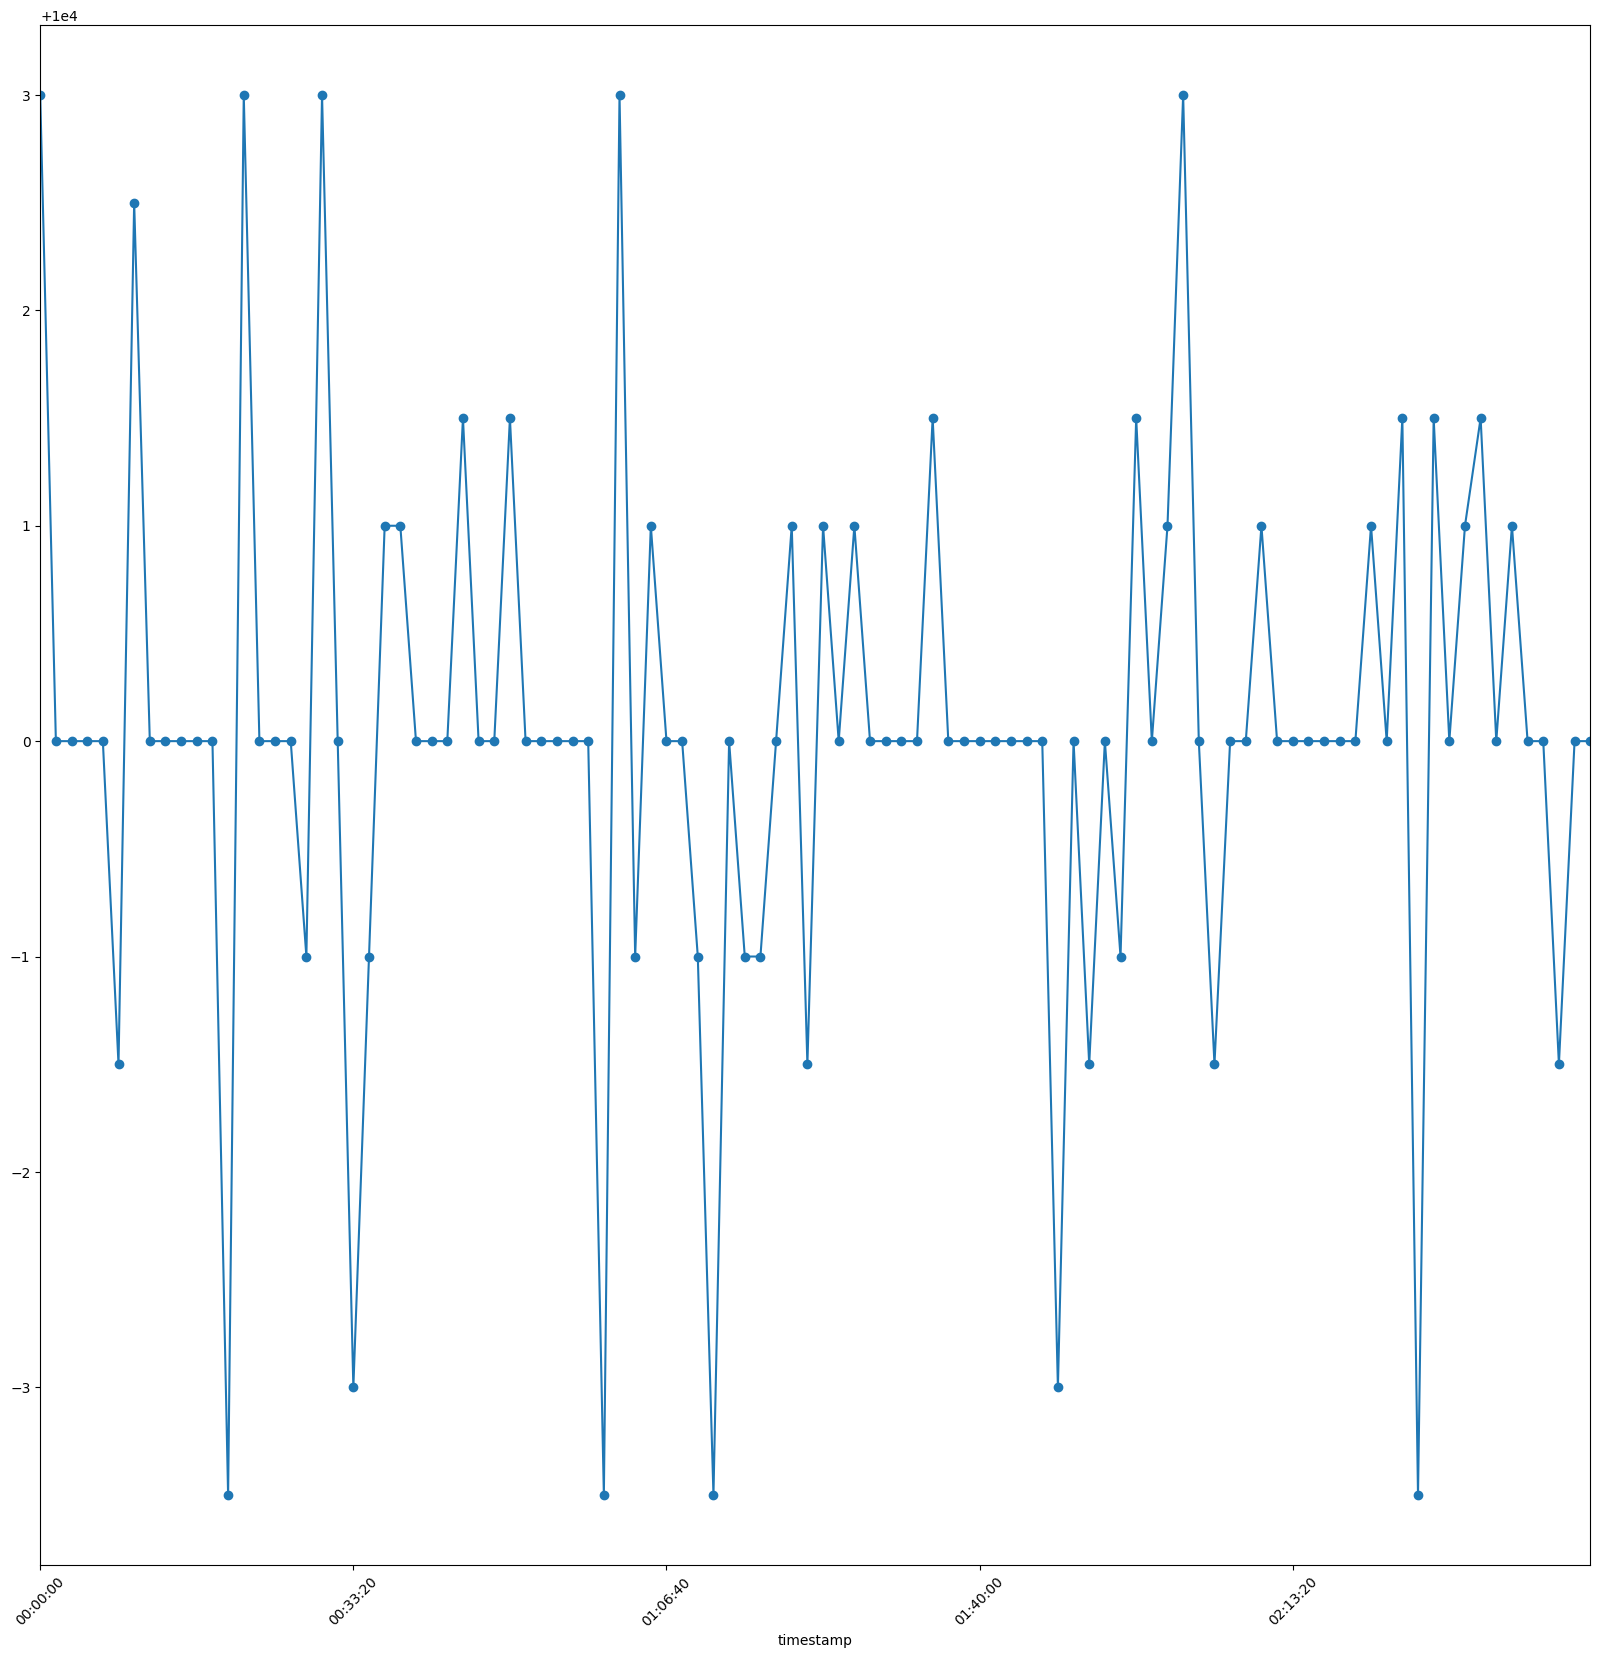

In [405]:
%matplotlib inline
resampled_rf_resin  = resample(rainforest_resin_price, '1000s')
resampled_rf_resin.index = resampled_rf_resin.index.total_seconds() * 1000
hist_mean = rainforest_resin_price.mean()
hist_std = rainforest_resin_price.std()
rainforest_resin_price_norm = (rainforest_resin_price - hist_mean)/hist_std
rolling_rf_resin = rainforest_resin_price_norm.rolling(100).mean()
rainforest_resin_price[:100].plot(marker='o')

plt.xticks(rotation=45)
plt.show()

<Axes: ylabel='Frequency'>

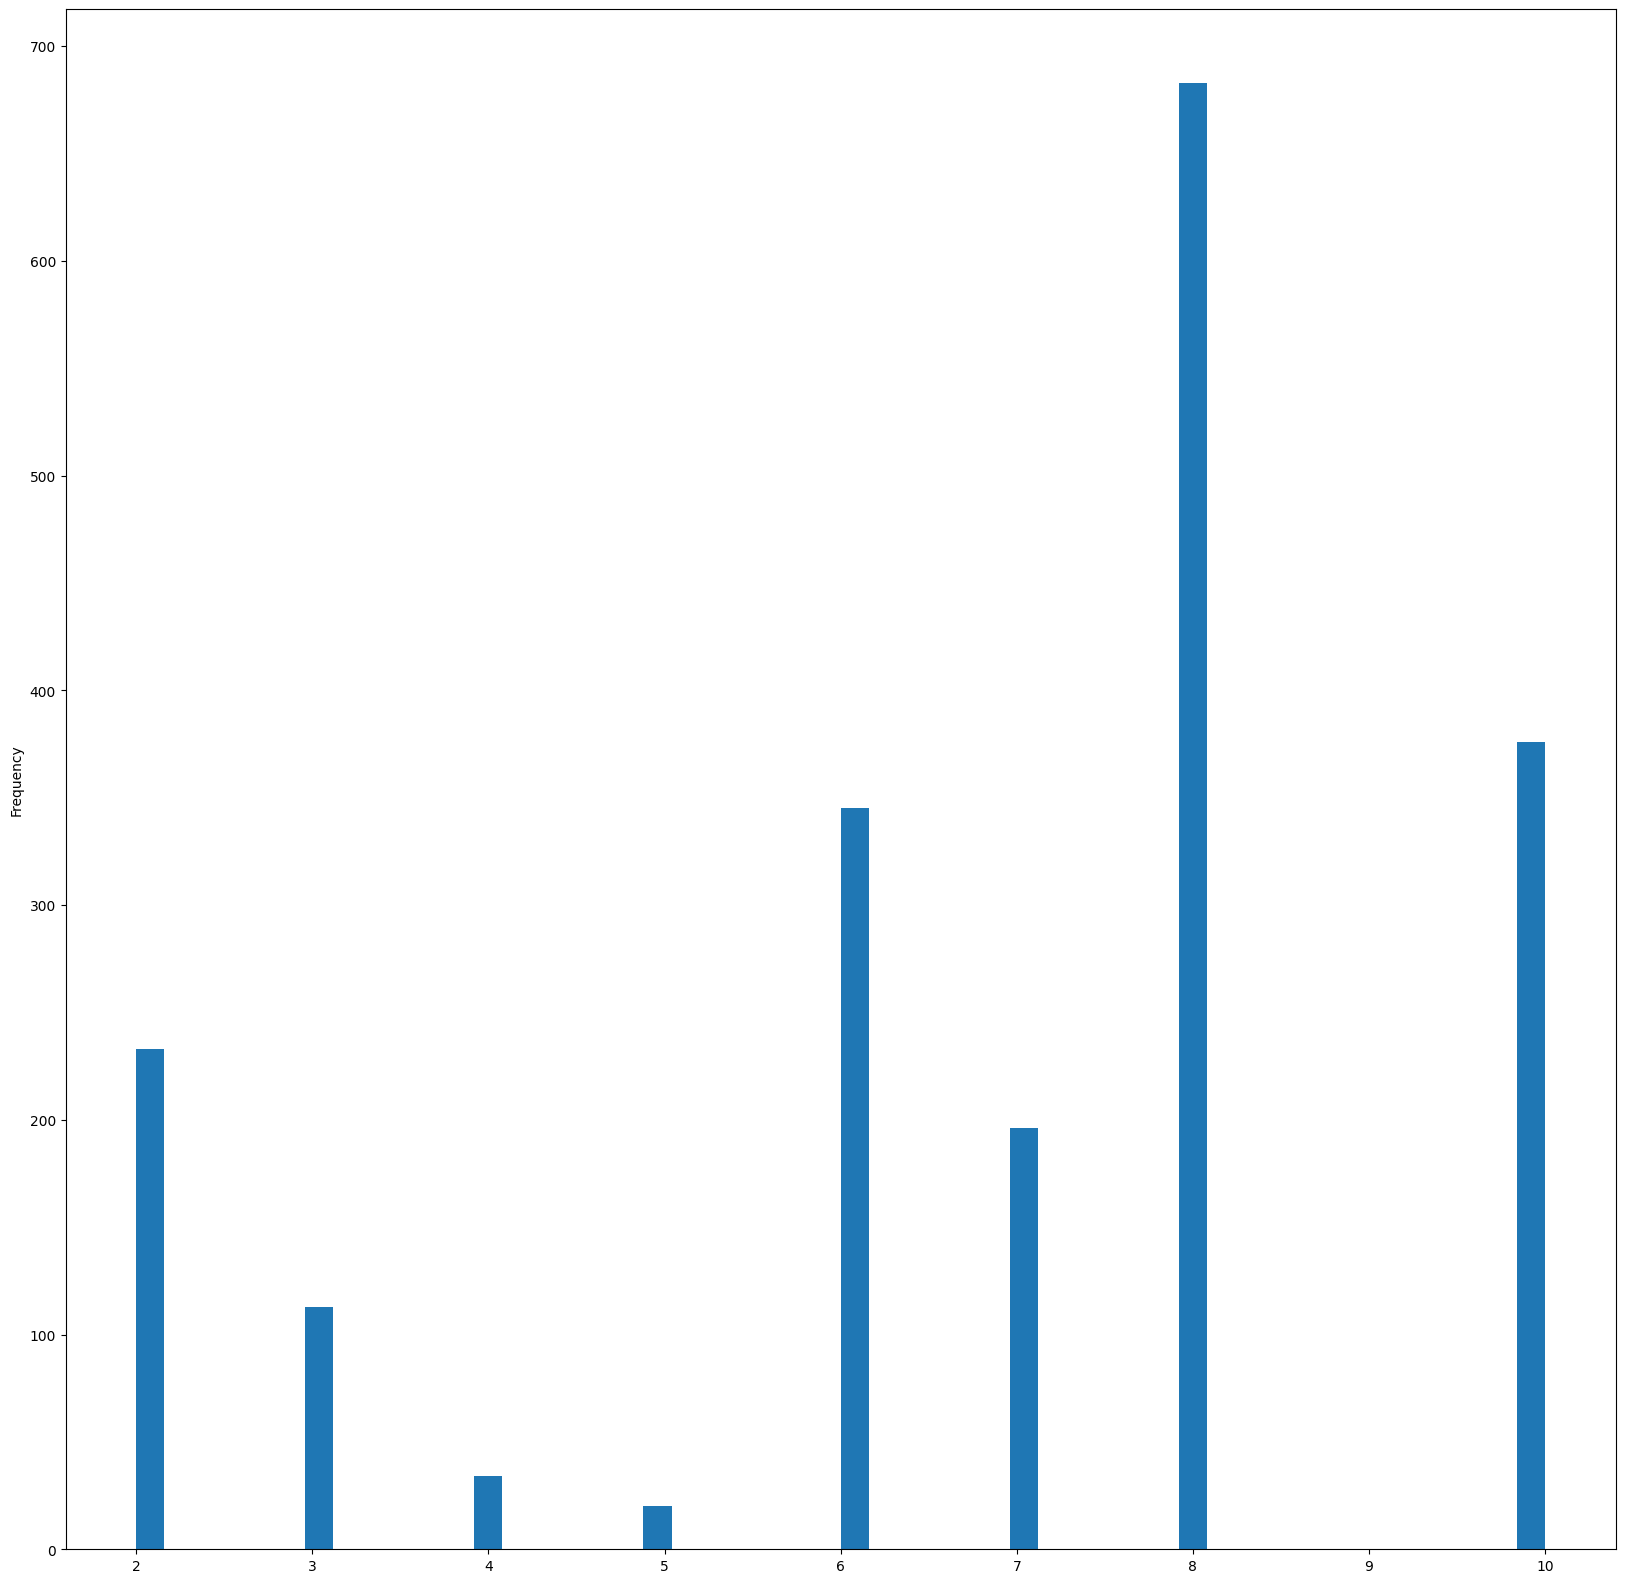

In [477]:
%matplotlib inline
kelp_data = history.xs('RAINFOREST_RESIN', level='product')
bid_ask = kelp_data['ask_price_1'] - kelp_data['bid_price_1']
bid_ask.plot(kind='hist', bins=50)

In [476]:
len(bid_ask)

2000

[]

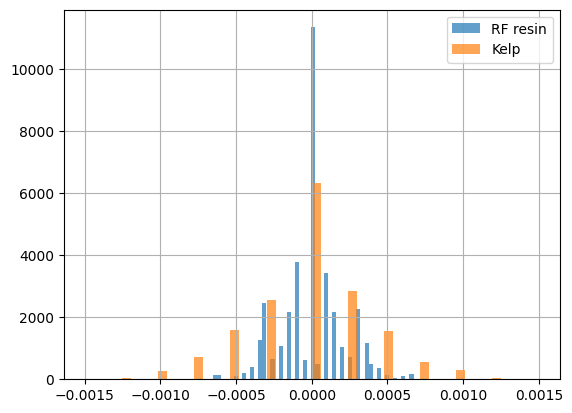

In [97]:
pc_rf_resin.hist(alpha=0.7, bins=50, density=True, label='RF resin')
pc_kelp.hist(alpha=0.7, bins=50, density=True, label='Kelp')
plt.legend()
plt.plot()

In [104]:
pc_kelp.corr(pc_rf_resin)

0.08214793389778433

In [102]:
import numpy as np
from scipy.stats import pearsonr

# Compute correlation and p-value
r, p_value = pearsonr(pc_kelp[1:], pc_rf_resin[1:])

print(f"Correlation: {r:.4f}, p-value: {p_value:.4f}")

if p_value < 0.05:
    print("Correlation is statistically significant.")
else:
    print("Correlation is NOT statistically significant.")


Correlation: 0.0821, p-value: 0.0002
Correlation is statistically significant.


In [126]:
! pip install backtrader

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

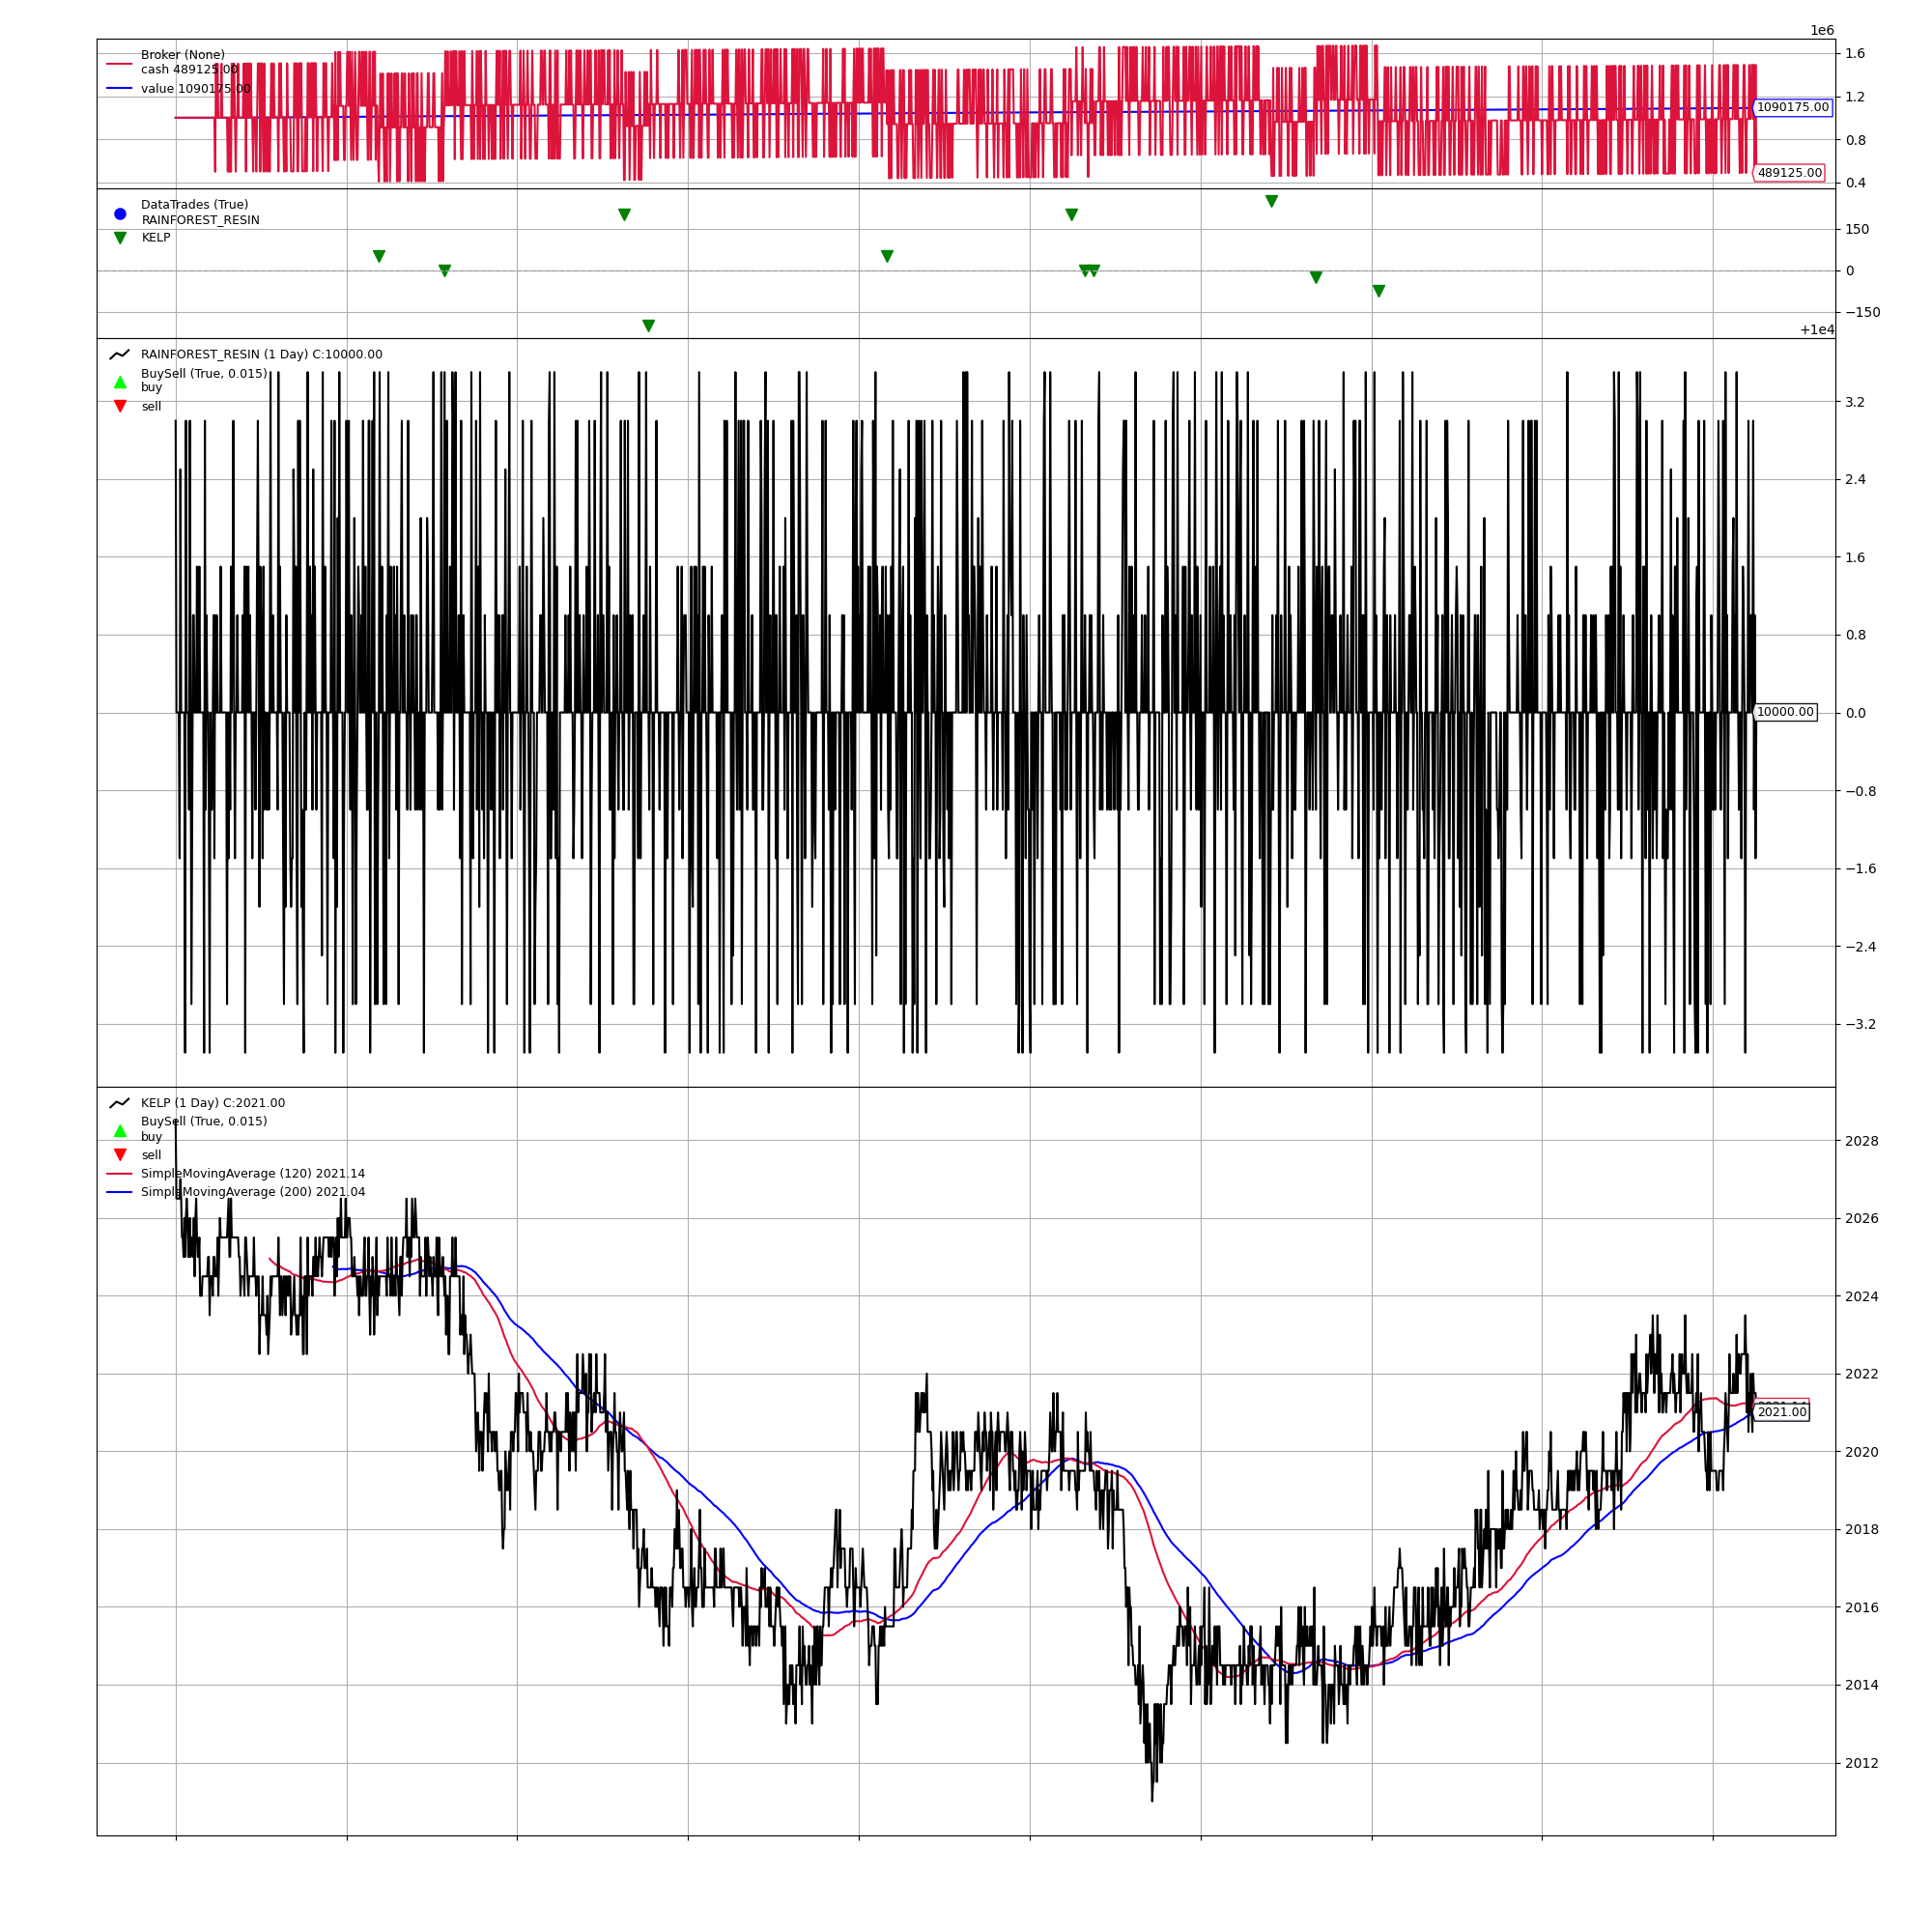

In [465]:
import backtrader as bt
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image

%matplotlib inline
import matplotlib.pyplot as pl
pl.style.use("default") #ggplot is also fine
pl.rcParams["figure.figsize"] = (20,20)


# Load dataset
df = pd.read_csv('4221de97-1b5b-4790-ba48-700bac4cc162.csv', sep=';')

# Convert timestamp to datetime
df['datetime'] = pd.to_datetime(df['timestamp'], unit='s')
df.set_index('datetime', inplace=True)

# Ensure no NaN values in mid_price
df['mid_price'] = df['mid_price'].ffill()
df.dropna(subset=['mid_price'], inplace=True)

df.drop(['profit_and_loss'], axis=1, inplace=True)

# Backtrader Data Feed
class CustomData(bt.feeds.PandasData):
    params = (
        ('datetime', None),
        ('open', -1),
        ('high', -1),
        ('low', -1),
        ('close', -1),
        ('volume', -1),
    )

    # Mapping backtrader OHLC to mid_price
    lines = ('close',)
    params = (('close', 15),)  # mid_price column index

# Moving Average Cross Strategy
class MovingAverageCrossStrategy(bt.Strategy):
    params = (
        ('fast_period', 120),
        ('slow_period', 200),
        ('kelp_limit', 50),
    )

    def __init__(self):
        self.sma_fast = {data: bt.indicators.SimpleMovingAverage(data.close, period=self.params.fast_period) for data in self.datas if data._name == "KELP"}
        self.sma_slow = {data: bt.indicators.SimpleMovingAverage(data.close, period=self.params.slow_period) for data in self.datas if data._name == "KELP"}

    def next(self):
        for data in self.datas:
            if data._name != "KELP":
                continue

            position = self.getposition(data).size
            max_position = self.params.kelp_limit

            if self.sma_fast[data][0] > self.sma_slow[data][0]:  # Bullish crossover
                if position < max_position:
                    self.buy(data=data, size=int((max_position-position)))
            elif self.sma_fast[data][0] < self.sma_slow[data][0]:  # Bearish crossover
                if position > -max_position:
                    self.sell(data=data, size=int((position+max_position)))


# Mean Reversion Strategy for RAINFOREST_RESIN
class MeanReversionStrategy(bt.Strategy):
    params = (
        ('lookback', 50),
        ('historical_mean', 10000.05),
        ('historical_std', 1.4813),
        ('entry_threshold', 0.1),
        ('exit_threshold', 0.01),
        ('resin_limit', 50),
    )

    def __init__(self):
        self.mean = {data: bt.indicators.SimpleMovingAverage(data.close, period=self.params.lookback) for data in self.datas if data._name == "RAINFOREST_RESIN"}
        #self.stddev = {data: bt.indicators.StandardDeviation(data.close, period=self.params.lookback) for data in self.datas if data._name == "RAINFOREST_RESIN"}

    def next(self):
        for data in self.datas:
            if data._name != "RAINFOREST_RESIN":
                continue
            position = self.getposition(data).size
            max_position = self.params.resin_limit
            price = data.close[0]

            if price > 0+1e4:
                self.sell(data=data, size=int((position+max_position)*1))
            elif price < -0+1e4:
                self.buy(data=data, size=int((max_position-position))*1)
            else:
                self.close(data=data)               

            # z_score = (self.mean[data][0] - self.params.historical_mean) / (self.params.historical_std + 1e-8)

            # if z_score > self.params.entry_threshold:  # Price is too high
            #     self.sell(data=data, size=int((position+max_position)*1))
            # elif z_score < -self.params.entry_threshold:  # Price is too low
            #     self.buy(data=data, size=int((max_position-position))*1)
            # elif abs(z_score) < self.params.exit_threshold:  # Mean reversion
            #     if position > 0:
            #         self.sell(data=data, size=position)
            #     elif position < 0:
            #         self.buy(data=data, size=-position)                 

# Initialize Cerebro Engine
cerebro = bt.Cerebro()
cerebro.addstrategy(MovingAverageCrossStrategy)
cerebro.addstrategy(MeanReversionStrategy)

# Add Data to Backtrader
for product in df['product'].unique():
    product_df = df[df['product'] == product].copy()
    product_df['open'] = product_df['mid_price']
    product_df['high'] = product_df['mid_price']
    product_df['low'] = product_df['mid_price']
    product_df['close'] = product_df['mid_price']
    product_df['volume'] = 1  # Placeholder volume
    
    data = CustomData(dataname=product_df, name=product)
    cerebro.adddata(data)
    cerebro.addanalyzer(bt.analyzers.TimeReturn, data=data, _name='timereturns')

cerebro.broker.set_cash(1e6)
cerebro.broker.set_coc(True)

# Run Backtest
cerebro.addanalyzer(bt.analyzers.PyFolio, _name="pyfolio")
cerebro.addanalyzer(bt.analyzers.SharpeRatio, _name="sharpe")
cerebro.addanalyzer(bt.analyzers.DrawDown, _name="drawdown")
results = cerebro.run()

fig = cerebro.plot(width=2000, height=2000, tight=True, dpi=1000, volume=False)[0][0]
fig.savefig('backtest_plot.png')

# Display the saved image
Image(filename='backtest_plot.png')

In [466]:
strat = results[0]

# Sharpe Ratio
sharpe = strat.analyzers.sharpe.get_analysis()
print(f"Sharpe Ratio: {sharpe.get('sharperatio', 'N/A')}")

# Drawdown
drawdown = strat.analyzers.drawdown.get_analysis()
print(f"Max Drawdown: {drawdown['max']['drawdown']:.2f}%")


Sharpe Ratio: None
Max Drawdown: 0.02%


In [467]:
PnL = cerebro.broker.getvalue() - 1e6
print(f'PnL: {PnL}')

PnL: 90175.0
